In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
import statsmodels.api as sm
from scipy.stats import pearsonr, zscore, linregress, f,chi2, norm
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Helvetica'

In [2]:
H3K9me3_result_df_2_10 = pd.read_csv('ABC_gene_stats.txt', sep='\t')

/var/folders/v1/3py01kc1619d4sj6bsmhx3br0000gn/T/ipykernel_63238/1000755475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=filtered_df, x='Group', y='q_value_wFMRP_neglog10',


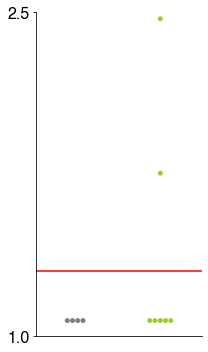

In [3]:
H3K9me3_result_df_2_10['Group'] = H3K9me3_result_df_2_10['cv_FXS_zscore'].apply(
    lambda x: 'High' if x > 2 else 'Low' if x < 1.25 else None
)
plt.figure(figsize=(3, 5))
filtered_df = H3K9me3_result_df_2_10.query('NPC_BREACH == True and Group.notnull()')

sns.swarmplot(data=filtered_df, x='Group', y='q_value_wFMRP_neglog10', 
         palette={'High': 'yellowgreen', 'Low': 'grey'}, 
         size=5, order=['Low','High'])
    

plt.ylim(1, 2.5)
plt.yticks([1,2.5], fontsize=16)
sns.despine(right=True)
plt.ylabel('')
plt.xlabel('')
plt.xticks([])
plt.axhline(-np.log10(.05), color='red')

plt.tight_layout()
#plt.savefig('gene_wFMRP_NPC.pdf', dpi=1000)
plt.show()

In [5]:
genes = H3K9me3_result_df_2_10.query("(NPC_BREACH == True) and (Group == 'High')")
random.seed('ELIO')
n_iterations = 1000
null_distribution = []

false_group = H3K9me3_result_df_2_10[H3K9me3_result_df_2_10['NPC_BREACH'] == False].query('cv_FXS_zscore > 2')['q_value_wFMRP_neglog10'].values

for _ in range(n_iterations):
    sampled_genes = np.random.choice(false_group, size=len(genes), replace=False)
    null_distribution.append(np.mean(sampled_genes))

null_distribution = np.array(null_distribution)

genes_statistic = genes['q_value_wFMRP_neglog10'].mean()

genes_p_value = np.sum(null_distribution >= genes_statistic) / n_iterations
print(f"{genes_p_value}")

0.043


0.043


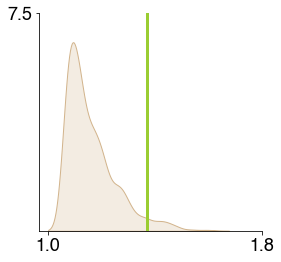

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(null_distribution, color='tan', fill=True, alpha=0.25, label="Null Distribution", ax=ax)

ax.axvline(genes_statistic, color='yellowgreen', linewidth=3, label='mosaic_NPC')
plt.xlabel('', fontsize=12)
plt.ylabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim(0,7.5)
plt.yticks([7.5], fontsize=18)
plt.xticks([1.0,1.8], fontsize=18)
genes_p_value = np.sum(null_distribution >= genes_statistic) / n_iterations
print(f"{genes_p_value}")
#plt.savefig('NPC_mosaic_draw.pdf', dpi=1000)
plt.show()

In [7]:
genes = H3K9me3_result_df_2_10.query("(NPC_BREACH == True) and (Group == 'Low')")
random.seed('ELIO')
n_iterations = 1000
null_distribution = []

false_group = H3K9me3_result_df_2_10[H3K9me3_result_df_2_10['NPC_BREACH'] == False].query('cv_FXS_zscore < 1.25')['q_value_wFMRP_neglog10'].values

for _ in range(n_iterations):
    sampled_genes = np.random.choice(false_group, size=len(genes), replace=False)
    null_distribution.append(np.mean(sampled_genes))

null_distribution = np.array(null_distribution)
genes_statistic = genes['q_value_wFMRP_neglog10'].mean()

genes_p_value = np.sum(null_distribution >= genes_statistic) / n_iterations
print(f"{genes_p_value}")

1.0


1.0


/var/folders/v1/3py01kc1619d4sj6bsmhx3br0000gn/T/ipykernel_62655/1393276394.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(null_distribution, color='tan', fill=True, alpha=0.25, label="Null Distribution", ax=ax, bw=.2)


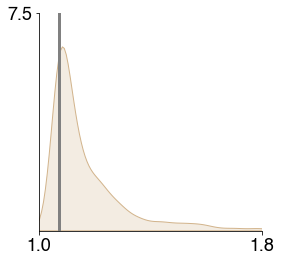

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(null_distribution, color='tan', fill=True, alpha=0.25, label="Null Distribution", ax=ax, bw=.2)

ax.axvline(genes_statistic, color='grey', linewidth=3, label='mosaic_NPC')
plt.xlabel('', fontsize=12)
plt.ylabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim(0,7.5)
plt.yticks([7.5], fontsize=18)
plt.xlim(1.0,1.8)
plt.xticks([1.0,1.8], fontsize=18)
genes_p_value = np.sum(null_distribution >= genes_statistic) / n_iterations
print(f"{genes_p_value}")
#plt.savefig('NPC_invariant_draw.pdf', dpi=1000)
plt.show()

In [4]:
H3K9me3_result_df_2_10 = H3K9me3_result_df_2_10.merge(pd.read_csv('zscore_ABC.csv'), on='gene', how='left')

In [5]:
H3K9me3_result_df_2_10

,gene,cv_FXS_zscore,NPC_BREACH,Pearson_rho_wFMRP,q_value_wFMRP,q_value_wFMRP_neglog10,Unnamed: 6,Group,Pearson_rho_Gene
0,A1BG,1.894464,False,0.580341,0.040235,1.395396,NaN,None,0.450481
1,A2M,0.172526,False,0.479707,0.084987,1.070650,NaN,Low,-0.239877
2,A3GALT2,0.607707,False,0.618591,0.021565,1.666260,NaN,Low,-0.415392
3,AAAS,-0.282188,False,0.469855,0.084987,1.070650,NaN,Low,0.104489
4,AACS,-0.221037,False,0.466536,0.084987,1.070650,NaN,Low,0.047832
...,...,...,...,...,...,...,...,...,...
14001,ZXDB,-0.373912,False,0.493608,0.084987,1.070650,NaN,Low,-0.250278
14002,ZXDC,1.309538,False,0.509775,0.084987,1.070650,NaN,None,-0.334240
14003,ZYG11B,0.207006,False,0.467316,0.084987,1.070650,NaN,Low,-0.147419
14004,ZYX,0.560137,False,0.467402,0.084987,1.070650,NaN,Low,0.265511


/var/folders/v1/3py01kc1619d4sj6bsmhx3br0000gn/T/ipykernel_63238/1845304907.py:19: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.3`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(null_distribution, color='tan', fill=True, alpha=0.25, label="Null Distribution", ax=ax,bw=.3)
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


0.02300000000000002


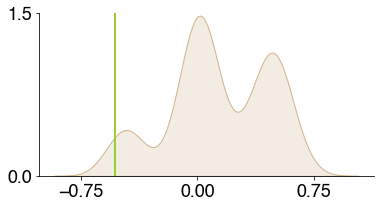

In [11]:
genes = H3K9me3_result_df_2_10.query("(NPC_BREACH == True) and (Group == 'High')").query('q_value_wFMRP < 0.05')
control = H3K9me3_result_df_2_10.query("NPC_BREACH == False").query('q_value_wFMRP < 0.05')
n_iterations = 1000
null_distribution = []

false_group = control['Pearson_rho_Gene'].values

for _ in range(n_iterations):
    sampled_genes = np.random.choice(false_group, size=len(genes), replace=False)
    null_distribution.append(np.mean(sampled_genes))

null_distribution = np.array(null_distribution)

genes_statistic = genes['Pearson_rho_Gene'].mean()

genes_p_value = 1 - (np.sum(null_distribution >= genes_statistic) / n_iterations)

fig, ax = plt.subplots(figsize=(6, 3))
sns.kdeplot(null_distribution, color='tan', fill=True, alpha=0.25, label="Null Distribution", ax=ax,bw=.3)

ax.axvline(genes_statistic, color='yellowgreen', linewidth=2)

plt.xlabel('', fontsize=12)
plt.ylabel('')

plt.xticks([-0.75, 0, 0.75], fontsize=18)
plt.ylim(0, 1.5)
plt.yticks([0, 1.5], fontsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save and show the plot
plt.savefig('bootstrap_mosaic_2_rho.pdf', dpi=1000)
print(genes_p_value)
plt.show()

In [7]:
def get_weights(df, gene):
    X = df[["PMBC [ng FMRP/ ug total protein]", gene]]
    y = df["ABC"]
    X = sm.add_constant(X)  # Add a constant to the model (intercept)
    model = sm.OLS(y, X).fit()
    print(H3K9me3_result_df_2_10.query("gene == @gene")['Pearson_rho_wFMRP'])
    intercept = model.params['const']
    coef1 = model.params["PMBC [ng FMRP/ ug total protein]"]
    coef2 = model.params[gene]
    equation = (f"y = {intercept:.4f} + {coef1:.4f} * 'PMBC [ng FMRP/ ug total protein]' "
                f"+ {coef2:.4f} * '{gene}'")
    print("Fit equation:", equation)
    return model.params

In [8]:
phenotype_methylation_genex = pd.read_csv('bloodRNAseq_zscores.txt', sep='\t')

5845    0.697396
Name: Pearson_rho_wFMRP, dtype: float64
Fit equation: y = 35.4375 + 7.3881 * 'PMBC [ng FMRP/ ug total protein]' + -8.4795 * 'KHDRBS2'


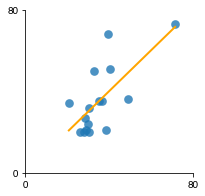

In [9]:
weights = get_weights(phenotype_methylation_genex, "KHDRBS2")

phenotype_methylation_genex["combined_predictor"] = (
    weights["PMBC [ng FMRP/ ug total protein]"] * phenotype_methylation_genex["PMBC [ng FMRP/ ug total protein]"] +
    weights["KHDRBS2"] * phenotype_methylation_genex["KHDRBS2"] + 35.4375
)
plt.figure(figsize=(3, 3))
g = sns.regplot(x="combined_predictor", y="ABC", data=phenotype_methylation_genex, ci=None, 
                line_kws={"lw": 2, 'color':"orange"}, scatter_kws={'linewidth': 0, 's': 75})

g.set_yticks([0, 80])
g.set_xticks([0, 80])
g.set_ylabel('')
g.set_xlabel('')
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
#plt.savefig('KHDRBS2_combined_predictor_ABC.pdf', dpi=1000)
plt.show()

10911    0.629052
Name: Pearson_rho_wFMRP, dtype: float64
Fit equation: y = 35.4375 + 5.8521 * 'PMBC [ng FMRP/ ug total protein]' + -7.1245 * 'SLITRK4'


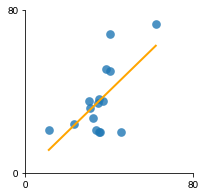

In [10]:
weights = get_weights(phenotype_methylation_genex, "SLITRK4")

phenotype_methylation_genex["combined_predictor"] = (
    weights["PMBC [ng FMRP/ ug total protein]"] * phenotype_methylation_genex["PMBC [ng FMRP/ ug total protein]"] +
    weights["SLITRK4"] * phenotype_methylation_genex["SLITRK4"] + 35.4375
)
plt.figure(figsize=(3, 3))
g = sns.regplot(x="combined_predictor", y="ABC", data=phenotype_methylation_genex, ci=None, 
                line_kws={"lw": 2, 'color':"orange"}, scatter_kws={'linewidth': 0, 's': 75})

g.set_yticks([0, 80])
g.set_xticks([0, 80])
g.set_ylabel('')
g.set_xlabel('')
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
#plt.savefig('SLITRK4_combined_predictor_ABC.pdf', dpi=1000)
plt.show()

In [11]:
brain_genes = pd.read_csv('BRAIN_BREACHes_genes_CV.csv')
H3K9me3_result_df = H3K9me3_result_df_2_10.merge(brain_genes, on='gene', how='right')

In [12]:
H3K9me3_result_df['Group'] = H3K9me3_result_df['cv_FXS_zscore_y'].apply(
    lambda x: 'High' if x > 1.25 else 'Low' if x < -1.25 else None
)

filtered_df = H3K9me3_result_df.query('BRAIN_BREACH == True and Group.notnull()')

/var/folders/v1/3py01kc1619d4sj6bsmhx3br0000gn/T/ipykernel_63210/3719382070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=filtered_df.query('q_value_wFMRP_neglog10.notna()'), x='Group', y='q_value_wFMRP_neglog10',
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


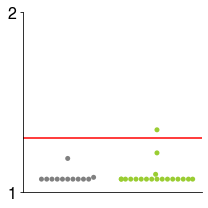

In [13]:
plt.figure(figsize=(3, 3))

sns.swarmplot(data=filtered_df.query('q_value_wFMRP_neglog10.notna()'), x='Group', y='q_value_wFMRP_neglog10', 
         palette={'High': 'yellowgreen', 'Low': 'grey'}, 
         size=5, order=['Low','High'])
    


plt.ylim(1, 2)
plt.yticks([1,2], fontsize=16)
sns.despine(right=True)
plt.ylabel('')
plt.xlabel('')
plt.xticks([])
plt.axhline(-np.log10(.05), color='red')

plt.tight_layout()
#plt.savefig('Pearson_p-value_wFMRP_brain.pdf', dpi=1000)
plt.show()

488    0.572908
Name: Pearson_rho_wFMRP, dtype: float64
Fit equation: y = 35.4375 + 5.5880 * 'PMBC [ng FMRP/ ug total protein]' + -5.8083 * 'ANGEL2'


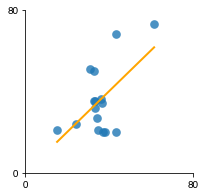

In [14]:
weights = get_weights(phenotype_methylation_genex, "ANGEL2")

phenotype_methylation_genex["combined_predictor"] = (
    weights["PMBC [ng FMRP/ ug total protein]"] * phenotype_methylation_genex["PMBC [ng FMRP/ ug total protein]"] +
    weights["ANGEL2"] * phenotype_methylation_genex["ANGEL2"] + 35.4375
)
plt.figure(figsize=(3, 3))
g = sns.regplot(x="combined_predictor", y="ABC", data=phenotype_methylation_genex, ci=None, 
                line_kws={"lw": 2, 'color':"orange"}, scatter_kws={'linewidth': 0, 's': 75})

g.set_yticks([0, 80])
g.set_xticks([0, 80])
g.set_ylabel('')
g.set_xlabel('')
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
#plt.savefig('ANGEL2_combined_predictor_ABC.pdf', dpi=1000)
plt.show()

In [15]:
wald_results = []

for gene in ['KHDRBS2', 'SLITRK4','ANGEL2']:
    
    # Define input and target
    X2 = phenotype_methylation_genex[["PMBC [ng FMRP/ ug total protein]", gene]]  
    y = phenotype_methylation_genex["ABC"]
    
    # Add intercept
    X2 = sm.add_constant(X2)

    # Fit full model
    model_full = sm.OLS(y, X2).fit()

    # Get coefficient and standard error for the gene
    beta_gene = model_full.params[gene]
    se_gene = model_full.bse[gene]

    # Compute Wald statistic
    Wald_stat = (beta_gene / se_gene) ** 2  
    p_value_Wald = 2 * (1 - norm.cdf(abs(beta_gene / se_gene)))  

    wald_results.append({
        "Gene": gene,
        "p-value Wald": p_value_Wald,
    })

wald_results_df = pd.DataFrame(wald_results)
wald_results_df

,Gene,p-value Wald
0,KHDRBS2,0.009078
1,SLITRK4,0.050163
2,ANGEL2,0.143057


In [16]:
results = []

for gene in ['KHDRBS2', 'SLITRK4','ANGEL2']:
    
    # Define input and target
    X1 = phenotype_methylation_genex[["PMBC [ng FMRP/ ug total protein]"]]  # Reduced model
    X2 = phenotype_methylation_genex[["PMBC [ng FMRP/ ug total protein]", gene]]  # Full model
    y = phenotype_methylation_genex["ABC"]
    
    # Add intercept
    X1 = sm.add_constant(X1)
    X2 = sm.add_constant(X2)

    # Fit models
    model_reduced = sm.OLS(y, X1).fit()
    model_full = sm.OLS(y, X2).fit()

    # Compute AIC
    AIC_reduced, AIC_full = model_reduced.aic, model_full.aic

    # Determine improvement
    delta_AIC = AIC_reduced - AIC_full

    results.append({
        "Gene": gene,
        "AIC_reduced": AIC_reduced,
        "AIC_full": AIC_full,
        "dAIC": delta_AIC,
    })

results_df = pd.DataFrame(results)
results_df

,Gene,AIC_reduced,AIC_full,dAIC
0,KHDRBS2,134.887275,130.149502,4.737772
1,SLITRK4,134.887275,132.750141,2.137134
2,ANGEL2,134.887275,134.443986,0.443289
